In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [47]:
df = pd.read_excel(r"C:\Users\samas\OneDrive\Desktop\ISA Roundtable\appl_vs_spx_2021.xlsx")
df.head(5)


,Date,AAPL,SPX,Mkt-RF,SMB,HML,RF
0,1993-02-05,-3.781495,-0.131113,-0.33,-0.46,0.65,0.012
1,1993-02-08,-1.310057,-0.198803,-0.21,0.04,0.39,0.012
2,1993-02-09,0.663713,-0.539342,-0.66,-0.09,0.22,0.012
3,1993-02-10,-1.978017,0.207837,0.20,-0.25,0.02,0.012
4,1993-02-11,-1.121057,0.322423,0.30,0.17,0.28,0.012


In [81]:
len(df)

7239

In [77]:
training_set = df.iloc[:int(len(df)*0.99), 1:2].values
test_set = df.iloc[int(len(df)*0.99):, 1:2].values

In [78]:
len(training_set)

7166

In [79]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [80]:
X_train = []
y_train = []
for i in range(60, 7166):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])


In [82]:
np.array(X_train).shape

(7106, 60)

In [83]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [84]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

7106/7106 [==============================] - 259s 35ms/step - loss: 0.0016


In [90]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:int(len(df)*0.99), 1:2]
dataset_test = df.iloc[int(len(df)*0.99):, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 134):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(74, 60, 1)


In [91]:
predicted_stock_return = model.predict(X_test)
predicted_stock_return = sc.inverse_transform(predicted_stock_return)

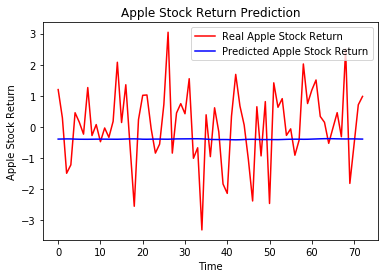

In [87]:
# Visualising the results
plt.plot(dataset_test['AAPL'][-100:].values, color = 'red', label = 'Real Apple Stock Return')
plt.plot(predicted_stock_return[-100:], color = 'blue', label = 'Predicted Apple Stock Return')
plt.title('Apple Stock Return Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Return')
plt.legend()
plt.show()

In [89]:
mse = np.mean(((predicted_stock_return - df.iloc[int(len(df)*0.99):, 1:2] ) ** 2))
mse

AAPL    1.599834
dtype: float64

In [92]:
predicted_stock_return[-1]

array([-0.39055103], dtype=float32)